# Data augmentation 

In order to introduce more variety to our dataset we implement different techniques of transformations to randomly apply them to the images in our dataset.

This would help on the trainin of our model.


## Libraries

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd

Mounted at /content/gdrive
/content


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from random import sample

## General Configuration




In [ ]:
#Project path 
%cd "/content/gdrive/Shareddrives/TC3007C Inteligencia Artificial/Data/data_15"
!ls

/content/gdrive/Shareddrives/TC3007C Inteligencia Artificial/Data/data_15
train  train_augmentation  validation


In [ ]:
#Function to plot the images as a result from the augmentation

def plotImages(images_result,numImg):
  #Subplot of 5 images
    fig, axes = plt.subplots(1, numImg, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_result, axes):  
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
#Train directory definition
base_dir = '/content/gdrive/Shareddrives/TC3007C Inteligencia Artificial/Data/data_15'
train_dir = os.path.join(base_dir,'train')
   

## Geometric transformations
Considering the positional differences in the dataset , this kind of transformations are the most optimal.


### Rotation

Random rotate the image by some number of degrees by a range from 0 to 360

In [ ]:
image_rotation_generator =ImageDataGenerator(rescale=1./255,rotation_range=135)

Found 18303 images belonging to 627 classes.


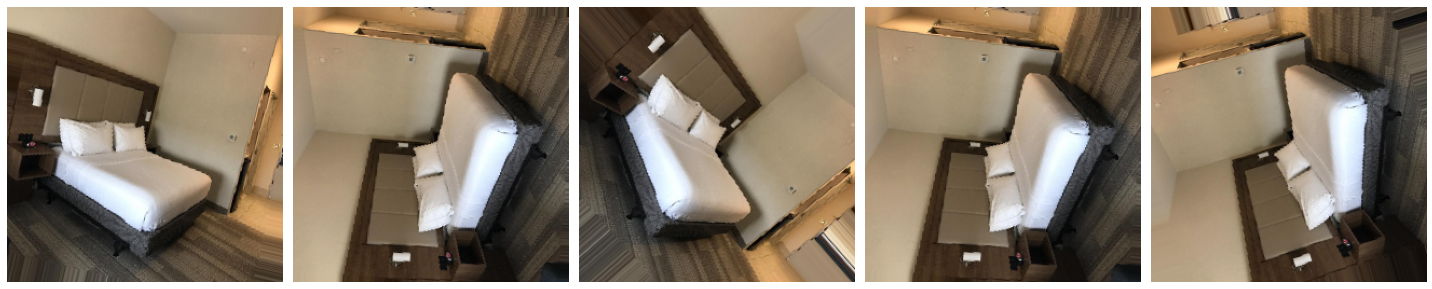

In [ ]:
train_data_gen = image_rotation_generator.flow_from_directory(batch_size=1,directory=train_dir, shuffle=True)
augmented_rotation_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_rotation_images,5)

### Width Shift
Change on the width of the image's pixels, is neccesary to specify the percentage of width to displace with a number between 0 and 1.

In [ ]:
image_width_generator = ImageDataGenerator(rescale=1./255,width_shift_range=0.1)

Found 18303 images belonging to 627 classes.


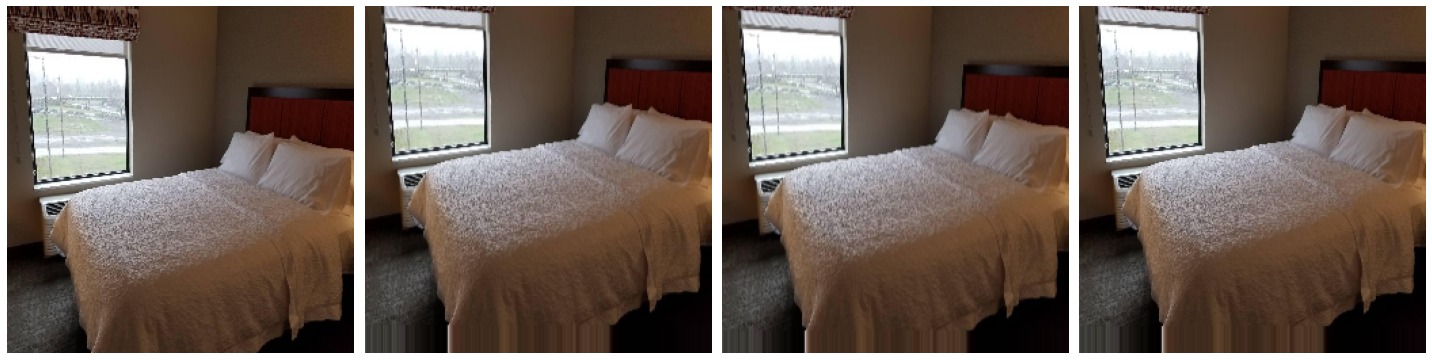

In [ ]:
train_data_gen = image_width_generator.flow_from_directory(batch_size=1,directory=train_dir, shuffle=True)
augmented_width_images = [train_data_gen[0][0][0] for i in range(4)]
plotImages(augmented_width_images,4)

### Height Shift

Shift the image in the y direction acording to a floating number between 0 and 1

In [ ]:
image_height_generator = ImageDataGenerator(rescale=1./255,height_shift_range=.15)

Found 18303 images belonging to 627 classes.


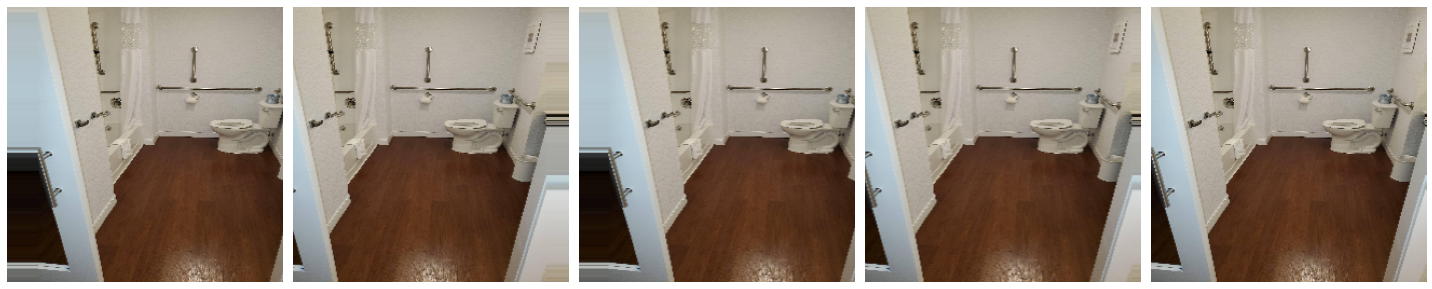

In [ ]:
train_data_gen = image_height_generator.flow_from_directory(batch_size=1,directory=train_dir, shuffle=True)
augmented_height_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_height_images, 5)

### Flipping

This flips change the columns and rows respectively acording to a boolean number that specify de flip will be done in vertical or horizantal direction.

In [ ]:
image_flipped_generator = ImageDataGenerator(rescale=1./255,horizontal_flip = True, vertical_flip= True)

Found 18303 images belonging to 627 classes.


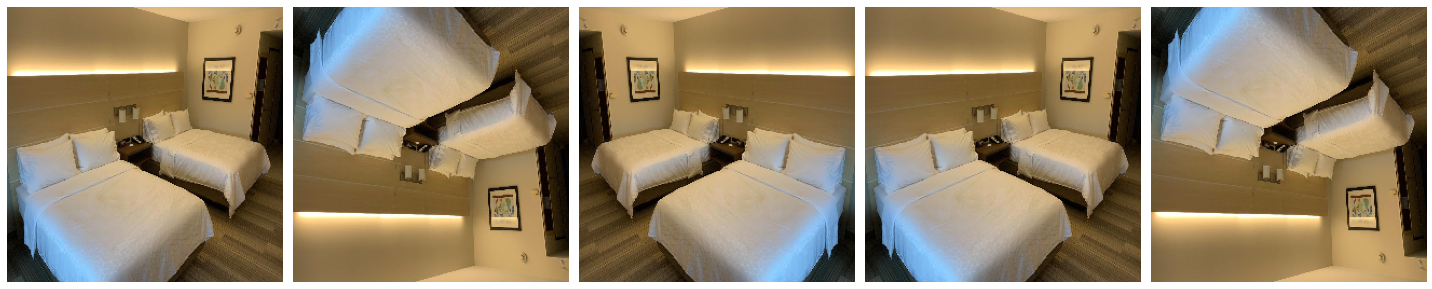

In [ ]:
train_data_gen = image_flipped_generator.flow_from_directory(batch_size=1,directory=train_dir, shuffle=True)
augmented_flipped_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_flipped_images, 5)

### Zoom

Magnifies the image if the range is less than 1, and zooms out the image if the range is greater than 1

In [ ]:
image_zoom_generator = ImageDataGenerator(rescale=1./255,zoom_range=-0.2)

Found 8469 images belonging to 187 classes.


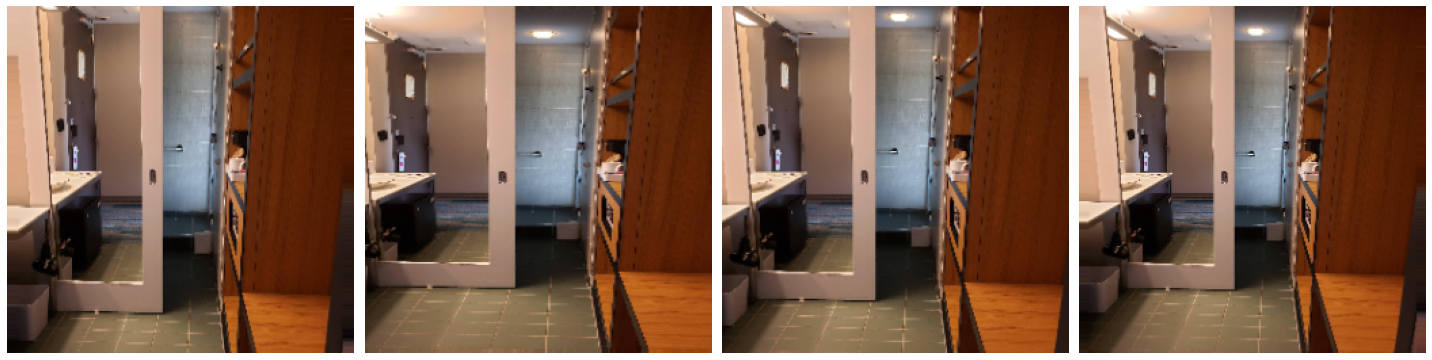

In [ ]:
train_data_gen = image_zoom_generator.flow_from_directory(batch_size=1,directory=train_dir, shuffle=True)
augmented_zoom_images = [train_data_gen[0][0][0] for i in range(4)]
plotImages(augmented_zoom_images,4)

### Shear intensity
Shifts everypoint with constant distance in a basis direction. 

In [ ]:
image_shear_generator = ImageDataGenerator(rescale=1./255,shear_range=10)

Found 18303 images belonging to 627 classes.


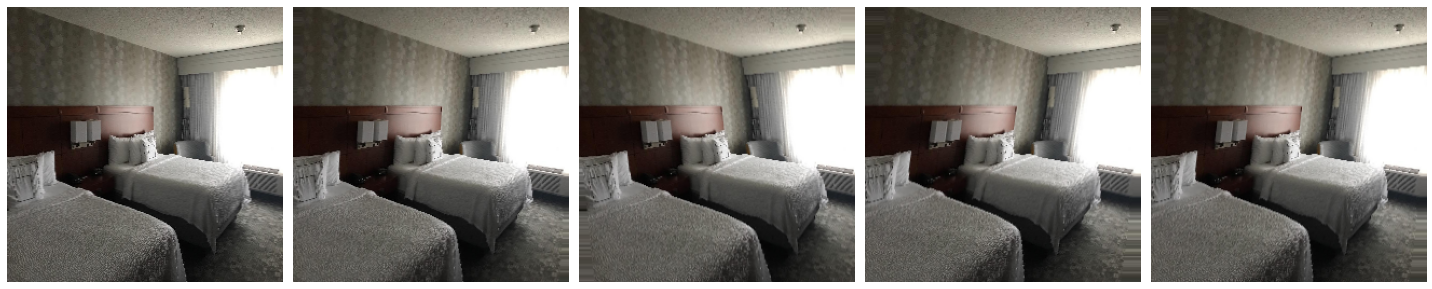

In [ ]:
train_data_gen = image_shear_generator.flow_from_directory(batch_size=1,directory=train_dir, shuffle=True)
augmented_shear_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_shear_images,5)

## Color space transformations

### Brightness

Random picking a brightness shift value from 0 to 1; where:
* 0 = no brightness
* 1 = maximum brightness

In [ ]:
image_brightness_generator = ImageDataGenerator(rescale=1./255,brightness_range=(0.2,1))

Found 8469 images belonging to 187 classes.


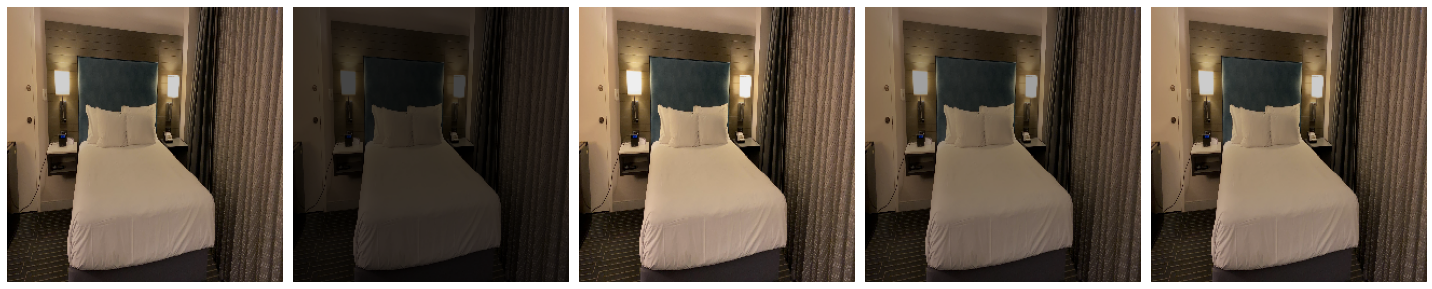

In [ ]:
train_data_gen = image_brightness_generator.flow_from_directory(batch_size=1,directory=train_dir, shuffle=True)
augmented_brightness_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_brightness_images,5)

### Channel shift

Channel separation and randomly mixed them according to a number.

In [ ]:
image_channel_generator = ImageDataGenerator(rescale=1./255,channel_shift_range=150)

Found 8469 images belonging to 187 classes.


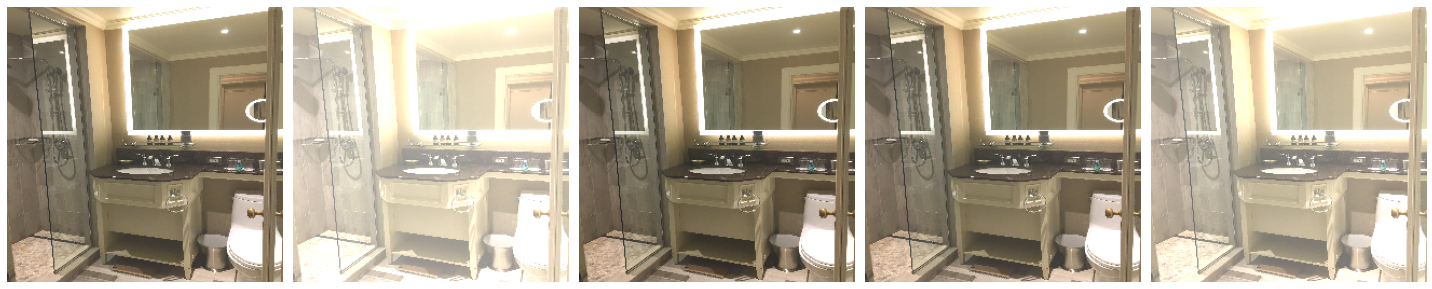

In [ ]:
train_data_gen = image_channel_generator.flow_from_directory(batch_size=1,directory=train_dir, shuffle=True)
augmented_channel_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_channel_images,5)

## All together

Combination of all the transformations and application into the dataset.

In [ ]:
def plotImages2(images_result,numImg, cols):
  #Subplot of 5 images
    fig, axes = plt.subplots(cols, numImg, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_result, axes):  
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255,rotation_range=120, brightness_range=(0.1,0.9),zoom_range=0.2,channel_shift_range=50,width_shift_range=0.2,height_shift_range=.1, horizontal_flip=True )

Found 8469 images belonging to 187 classes.


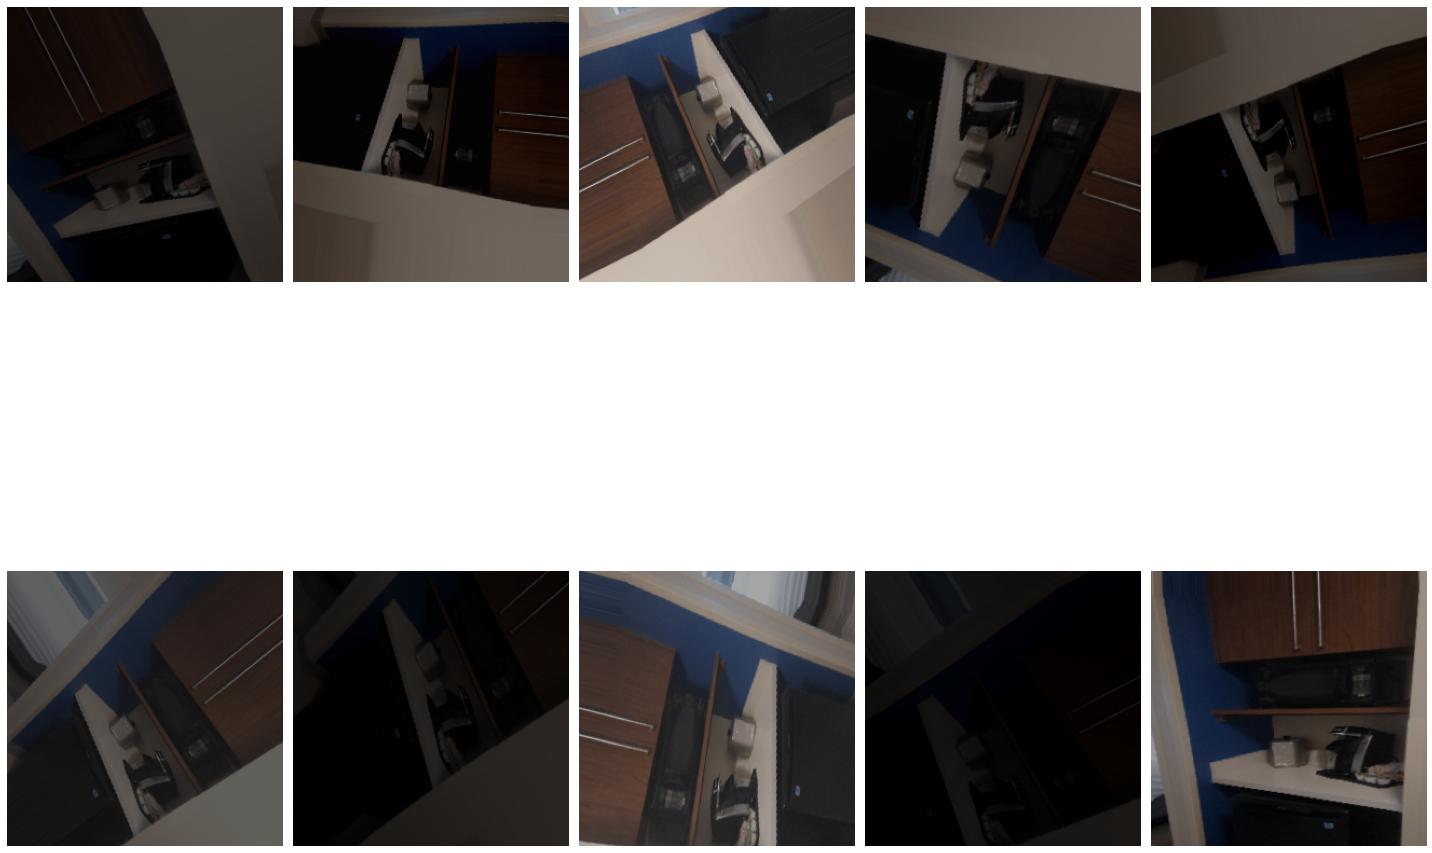

In [ ]:
train_data_gen = data_gen.flow_from_directory(batch_size=1,directory=train_dir, shuffle=True)
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
plotImages2(augmented_images,5,2)